# Starting EDA of pH project

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from collections import Counter
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [3]:
csv_file = "../Data/R12-over-10-copies.csv"
df = pd.read_csv(csv_file)
df.head()

,Sequence,Count
0,AGTGCCATCGTGCGTATCCTTCACTCCTTGCTCGACAAGAAGCGAA...,91
1,AGTGCCATCGTGCGTATCCTTCACGTTTGTTCTACAAAAGCGAAGC...,86
2,AGTGCCATCGTGCGTATCCTGAACATTGACGTGTAGTCAATGCGAA...,83
3,AGTGCCATCGTGCGTATCCCGCTCCGCTAATATCTATGTTAGCGAA...,80
4,AGTGCCATCGTGCGTATCCTGAACATAGACGTTTAGTCTATGCGAA...,78


In [4]:
df.shape

(10383, 2)

In [5]:
sum(df.iloc[:, 0].isnull())

0

In [6]:
sum(df.iloc[:, 1].isnull())

0

In [7]:
df.dtypes

Sequence    object
Count        int64
dtype: object

In [8]:
# check base type proportions
def base_count(text):
    return dict(Counter(text))   

In [9]:
df['Base Counts'] = df['Sequence'].apply(base_count)
# df['Base Counts'][1]['A']
df['A'] = df['Base Counts'].astype(object).apply(lambda x: x.get('A', np.nan))
df['C'] = df['Base Counts'].astype(object).apply(lambda x: x.get('C', np.nan))
df['T'] = df['Base Counts'].astype(object).apply(lambda x: x.get('G', np.nan))
df['G'] = df['Base Counts'].astype(object).apply(lambda x: x.get('T', np.nan))

In [10]:
df.head().iloc[:, 3:]

,A,C,T,G
0,24,26,26,22
1,22,27,29,20
2,23,23,29,23
3,24,25,28,21
4,24,21,30,23


In [11]:
df['Length'] = df['Sequence'].apply(len)

In [12]:
sum((np.sum(df[['A', 'C', 'T', 'G']], axis=1) == df['Length']).isnull()) # Checks base counts add up to length of sequence

0

In [13]:
allowed_keys = {'A', 'C', 'T', 'G'} # Checks that there are no weird nonstandard bases
df['Nonstandard base'] = df['Base Counts'].astype(object).apply(lambda x: not set(x.keys()).issubset(allowed_keys))
np.sum(df['Nonstandard base'])

0

In [14]:
df.head()

,Sequence,Count,Base Counts,A,C,T,G,Length,Nonstandard base
0,AGTGCCATCGTGCGTATCCTTCACTCCTTGCTCGACAAGAAGCGAA...,91,"{'A': 24, 'G': 26, 'T': 22, 'C': 26}",24,26,26,22,98,False
1,AGTGCCATCGTGCGTATCCTTCACGTTTGTTCTACAAAAGCGAAGC...,86,"{'A': 22, 'G': 29, 'T': 20, 'C': 27}",22,27,29,20,98,False
2,AGTGCCATCGTGCGTATCCTGAACATTGACGTGTAGTCAATGCGAA...,83,"{'A': 23, 'G': 29, 'T': 23, 'C': 23}",23,23,29,23,98,False
3,AGTGCCATCGTGCGTATCCCGCTCCGCTAATATCTATGTTAGCGAA...,80,"{'A': 24, 'G': 28, 'T': 21, 'C': 25}",24,25,28,21,98,False
4,AGTGCCATCGTGCGTATCCTGAACATAGACGTTTAGTCTATGCGAA...,78,"{'A': 24, 'G': 30, 'T': 23, 'C': 21}",24,21,30,23,98,False


In [15]:
df['Length'].value_counts().sort_values(ascending=False)

Length
98     9893
97      325
99       65
96       42
95       11
94        7
88        7
87        4
91        4
84        3
90        3
93        3
86        3
85        3
92        3
89        1
107       1
102       1
108       1
82        1
100       1
83        1
Name: count, dtype: int64

The sequences range in length from 82 to 108, but most commonly at 98.
As I recally, NGS clips the first few base pairs down from nominal 100 because of poor quality.
The other variants in sequence length are likely due to mutations from PCR errors.

In [16]:
v_df = df # Save a verbose version of df
df = df[['Sequence', 'Length', 'Count', 'A', 'C', 'T', 'G']]
df.head()

,Sequence,Length,Count,A,C,T,G
0,AGTGCCATCGTGCGTATCCTTCACTCCTTGCTCGACAAGAAGCGAA...,98,91,24,26,26,22
1,AGTGCCATCGTGCGTATCCTTCACGTTTGTTCTACAAAAGCGAAGC...,98,86,22,27,29,20
2,AGTGCCATCGTGCGTATCCTGAACATTGACGTGTAGTCAATGCGAA...,98,83,23,23,29,23
3,AGTGCCATCGTGCGTATCCCGCTCCGCTAATATCTATGTTAGCGAA...,98,80,24,25,28,21
4,AGTGCCATCGTGCGTATCCTGAACATAGACGTTTAGTCTATGCGAA...,98,78,24,21,30,23


In [17]:
for col in ['A', 'C', 'T', 'G']:
    df.loc[:, col] = df[col]/df['Length']

In [18]:
df.head()

,Sequence,Length,Count,A,C,T,G
0,AGTGCCATCGTGCGTATCCTTCACTCCTTGCTCGACAAGAAGCGAA...,98,91,0.244898,0.265306,0.265306,0.224490
1,AGTGCCATCGTGCGTATCCTTCACGTTTGTTCTACAAAAGCGAAGC...,98,86,0.224490,0.275510,0.295918,0.204082
2,AGTGCCATCGTGCGTATCCTGAACATTGACGTGTAGTCAATGCGAA...,98,83,0.234694,0.234694,0.295918,0.234694
3,AGTGCCATCGTGCGTATCCCGCTCCGCTAATATCTATGTTAGCGAA...,98,80,0.244898,0.255102,0.285714,0.214286
4,AGTGCCATCGTGCGTATCCTGAACATAGACGTTTAGTCTATGCGAA...,98,78,0.244898,0.214286,0.306122,0.234694


## Examine basic properties

### Frequency of a sequence

In [19]:
df['Count'].describe()

count    10383.000000
mean        14.926900
std          6.640851
min         10.000000
25%         11.000000
50%         13.000000
75%         16.000000
max         91.000000
Name: Count, dtype: float64

Frequency, or count, of a sequence in the pool is between 10 to 91.  10 is the minimum bc that is where we set the minimum for consideration, but when we retrieve the full dataset the counts will range from 1 to max.

How many sequences have only 10 copies in the pool? 91 copies?
To get a bird's eye view, we plot a histogram of the counts.

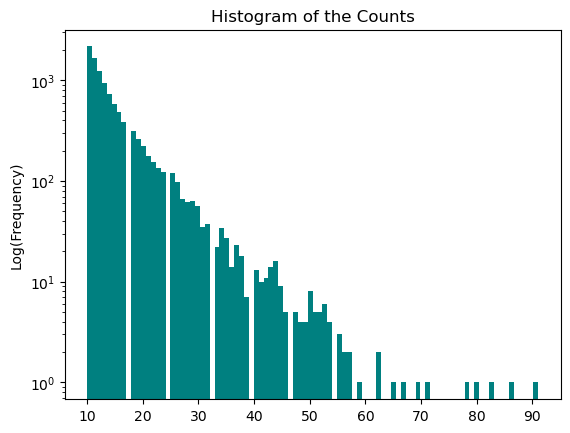

In [140]:
plt.hist(df['Count'].values, bins=92, color='teal')
plt.title('Histogram of the Counts')
plt.yscale('log')
plt.ylabel('Log(Frequency)')
plt.show()

Most of the sequences in the pool have fewer than 30 copies. There is a long right tail with a few sequences having about 10-fold higher copy number.

Generally, enrichment leads to a handful of sequences dominating the pool because of convergence.  100 copies in a 2e6 pool is in the noise compared to the usual outcome.  But, it may be possible that higher copy numbers in the pool are associated with greater pH reactivity.

#### A boxplot to see more clearly

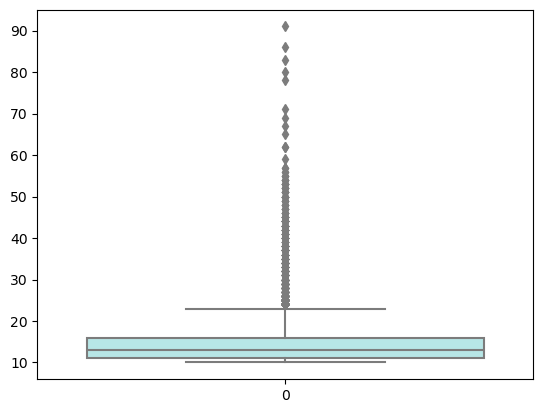

In [146]:
sns.boxplot(df['Count'].values, color='paleturquoise')
plt.show()

### Sequence Length

In [133]:
df['Length'].describe()

count    10383.000000
mean        97.929115
std          0.677246
min         82.000000
25%         98.000000
50%         98.000000
75%         98.000000
max        108.000000
Name: Length, dtype: float64

Nominally, the random initial library was 100 bp, and bc of the nature of NGS, the first 2 bp reads are discarded bc of poor quality, so we expect that sequences should have 98 bp.  (We can later add these bases back bc we know the first two bases since these were constant primer sites.)

Due to mutations, there is some dispersion around 98 bp, where max length is up to 108 and min at 82.

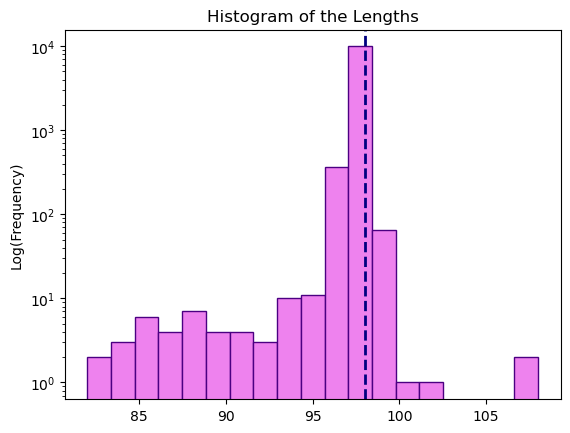

In [141]:
bins = np.linspace(82, 108, 20)
plt.hist(df['Length'], color='violet', bins=bins, edgecolor='indigo')
plt.title('Histogram of the Lengths')
plt.yscale('log')
plt.ylabel('Log(Frequency)')
plt.axvline(x=98, color='navy', linestyle='--', linewidth=2, label='98 bp')
plt.show()

Plotted on a log scale to more effectively show the distribution. We see right skewed data to my surprise, with a number of sequences cleaved to shorter than original library.

#### A box plot to see distribution summary

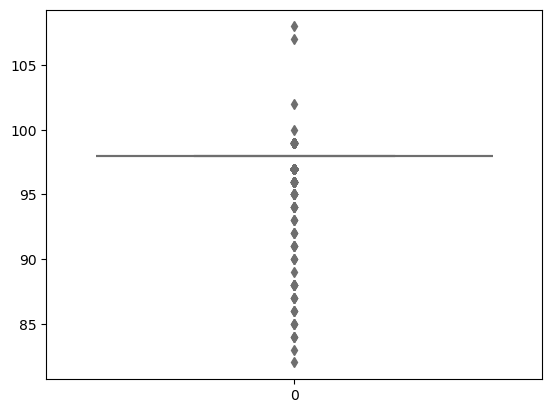

In [158]:
sns.boxplot(df['Length'].values, color='violet')
plt.show()

### Base composition

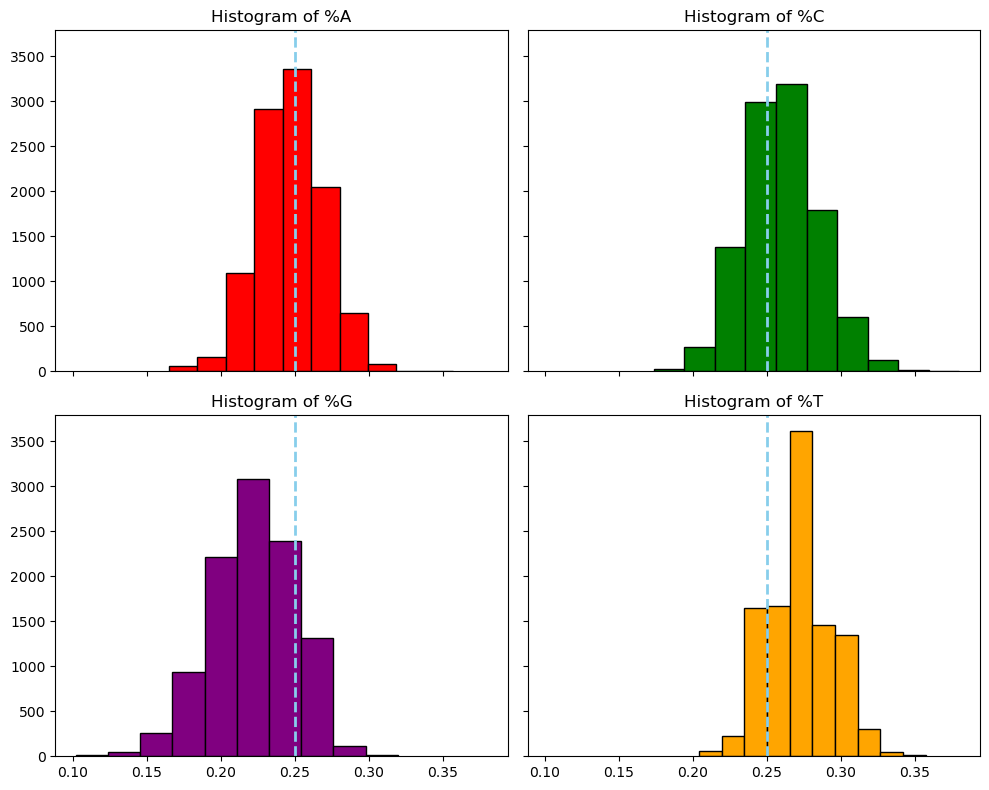

In [195]:
# bins = np.linspace(82, 108, 20)
INIT_FRAC = 0.25

fig, axes = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
                        
for base, ax in zip(base_columns, axes.flatten()):
    ax.hist(df[base], color=base_colors[base], edgecolor='black')
    ax.set_title(f'Histogram of %{base}')

    
    # values = base_frac_stats.loc[base]
    # ax.bar(categories, values, color=base_colors[base])
    ax.axvline(x=INIT_FRAC, color='skyblue', linestyle='--', linewidth=2)
 
plt.tight_layout()
plt.show()

These histograms are actually pretty informative.
Most sequences have a lower %G and a higher %T.

In [171]:
base_frac_stats = pd.DataFrame([df[base].describe() for base in base_columns])
base_frac_stats['range'] = base_frac_stats['max'] - base_frac_stats['min']
np.round(base_frac_stats, 2)

,count,mean,std,min,25%,50%,75%,max,range
A,10383.0,0.25,0.02,0.16,0.23,0.24,0.27,0.36,0.19
C,10383.0,0.26,0.02,0.17,0.24,0.27,0.28,0.38,0.21
G,10383.0,0.22,0.03,0.10,0.20,0.22,0.23,0.32,0.22
T,10383.0,0.27,0.02,0.20,0.26,0.27,0.29,0.36,0.15


C and T have the highest median percent fractions in the pool. G is the lowest at 0.22.
Standard deviation is about the same for all bases.
G has the largest range of values. 
The mean is close to the median for all, so I would say the base proportions are evenly distributed, not skew.

Given that the randomized regions should have approximately 25-25-25-25 makeup, we also calculated the percent difference from 0.25.  But we should keep in mind that the primer regions were designed and are expected to be relatively constant - we may choose to compare to a study where we consider only the variable regions.

In [172]:
v_base_frac_stats = base_frac_stats
base_frac_stats = base_frac_stats.iloc[:, [1, 3, 4, 5, 6, 7]]
base_frac_stats

,mean,min,25%,50%,75%,max
A,0.245924,0.164948,0.234694,0.244898,0.265306,0.357143
C,0.263716,0.173469,0.244898,0.265306,0.275510,0.380000
G,0.220563,0.102041,0.204082,0.224490,0.234694,0.319588
T,0.269797,0.204082,0.255102,0.265306,0.285714,0.357143


#### Plots comparing base composition.
Dashed line indicates 0.25 even fractions.
Easy to see that median G composition is notably lower than an even split.
Median T and C composition is a bit higher than initial fraction.

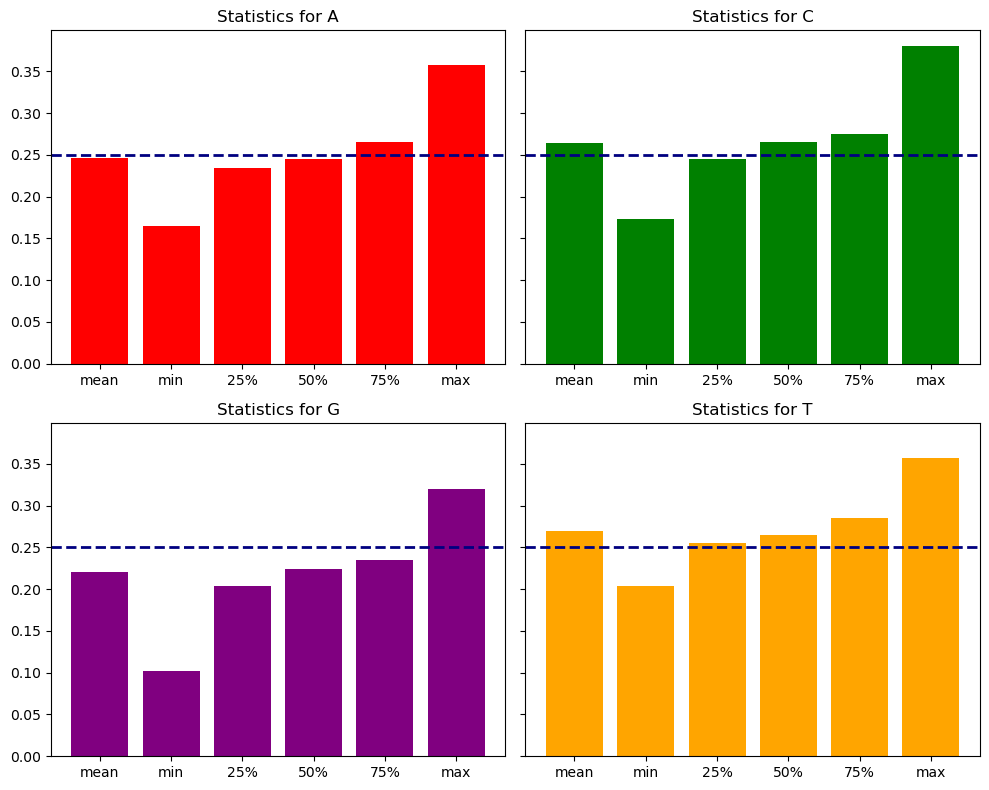

In [181]:
INIT_FRAC = 0.25
categories = base_frac_stats.columns.values

fig, axes = plt.subplots(2, 2, figsize=(10,8), sharey=True)
                        
for base, ax in zip(base_columns, axes.flatten()):
    values = base_frac_stats.loc[base]
    ax.bar(categories, values, color=base_colors[base])
    ax.axhline(y=INIT_FRAC, color='navy', linestyle='--', linewidth=2)
    ax.set_title(f'Statistics for {base}')

plt.tight_layout()
plt.show()

#### Quantify the departure from even split by calculating percent difference.

In [120]:
# Find percent difference of these stats from expected even base split
np.round((base_frac_stats.iloc[:, [1, 3, 4, 5, 6, 7]] - 0.25)/0.25 * 100, 1)

,mean,min,25%,50%,75%,max
A,-1.6,-34.0,-6.1,-2.0,6.1,42.9
C,5.5,-30.6,-2.0,6.1,10.2,52.0
G,-11.8,-59.2,-18.4,-10.2,-6.1,27.8
T,7.9,-18.4,2.0,6.1,14.3,42.9


Median values deviate from even split up to 10%, suggesting that enrichment influenced base frac away from the randomized initial state. i.e., there is signal over noise.

### Examine the relationship between frequency and base percentage.
Plot Count vs Base percentage.  See if there is a relationship.

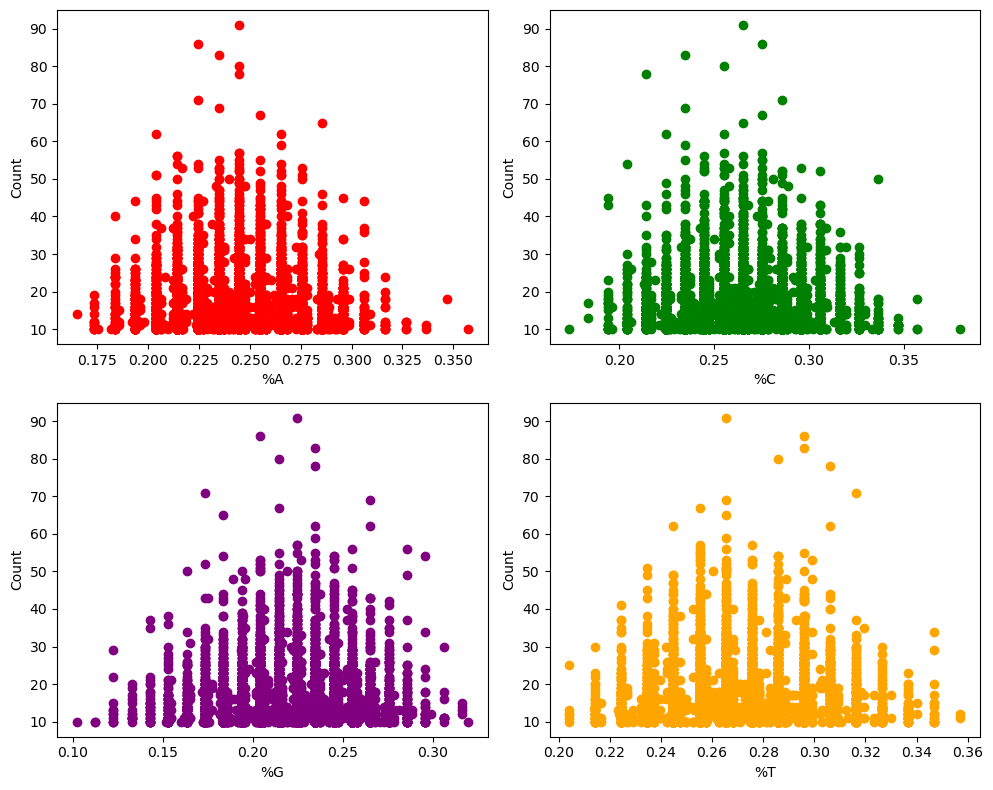

In [201]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# Plot Each Base Fraction
for ax, base in zip(axes.flatten(), base_columns):
    ax.scatter(df[base], df['Count'], color=base_colors[base])
    ax.set_xlabel(f'%{base}')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

#### Check out correlation by calculating Pearson's correlation

In [204]:
from scipy.stats import pearsonr

for base in base_columns:
    corr, p_value =pearsonr(df[base], df['Count'])
    print(f'%{base} - Count Correlation: r={corr:.5f}, p={p_value:.5f}')

%A - Count Correlation: r=-0.04910, p=0.00000
%C - Count Correlation: r=-0.00657, p=0.50350
%G - Count Correlation: r=0.03142, p=0.00136
%T - Count Correlation: r=0.02038, p=0.03784


Very weak correlations, but significant.

### By construction, variance of %base decreases with greater copy number.
Due to the outcome of enrichment, there are a large number of unique sequences wih the minimum copy number.  There are fewer unique sequences with a high copy number. See histogram of counts above.

For example, the sequence which has 91 copies in the pool are all the same, so no variance in base composition. Whereas, there are many more sequences in the pool which have the minimum copy number and they are all different, so there will be greater variance in composition.

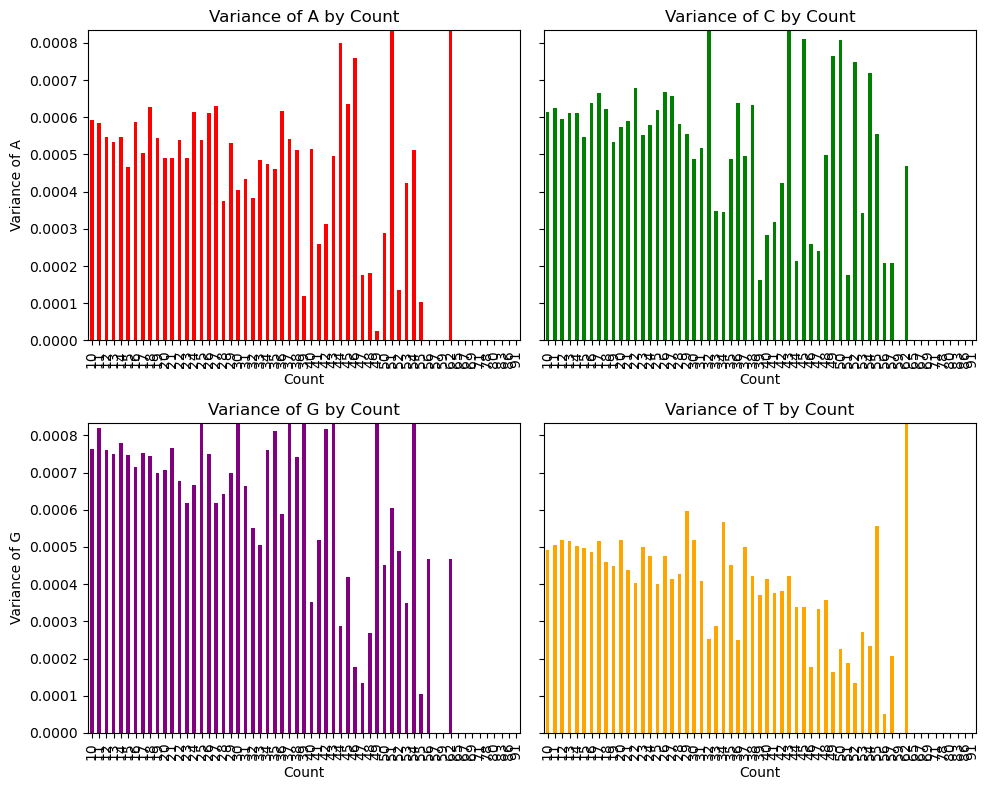

In [101]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=True)

# Compute global max variance for consistency
max_variance = max(df[col].var() for col in base_columns)

for col, ax in zip(base_columns, axes.flatten()):
    grouped_variance = df.groupby('Count')[col].var()
    grouped_variance.plot(kind='bar', ax=ax, color=base_colors[col])
    ax.set_title(f'Variance of {col} by Count')
    ax.set_xlabel('Count')
    ax.set_ylabel(f'Variance of {col}')
    ax.set_ylim(0, max_variance * 1.1)
    
plt.tight_layout()
plt.show()

### TODO Correlation of Length with Count

### TODO heatmap to spot patterns

## Conclusions
As we expected, preliminary EDA of basic sequence properties like count, length, %base composition did not reveal a smoking gun for the mechanism of pH-activity.

It makes sense to investigate second order effects such as:  
(1) Base pair combinations (kmer motifs)  
(2) Secondary structure prediction and folding energy scores